## Notebook to calculate the binder cumulant and average magnetization as a function of T and lattice size in order to benchmark ising model
- Binder Cumulant should cross near critical temperature
- see: https://www.hermetic.ch/compsci/thesis/chap3.htm

### First, we need to see how long it takes to reach thermal equilibrium. 
- This determines the length of the burn in period as well as the number of steps we need per SINGLE simulation
- We will then use this number to run many simulations with minimal length/storage space as possible

Lattice Size =  32 by 32


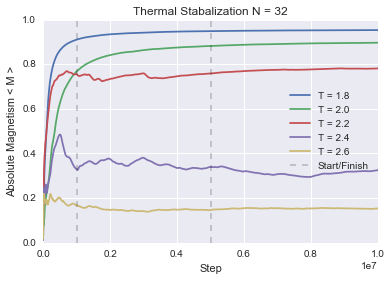

Lattice Size =  64 by 64


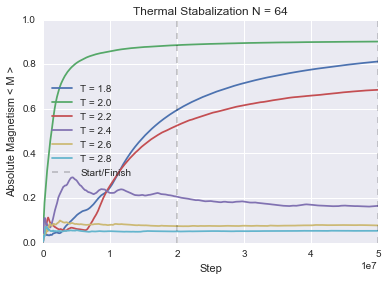

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#data = pd.read_table('N32_Dir/n32_stabalization.txt',header=None,names=['N','T','i','M'])
data = pd.read_table('N32_Dir/stabalization.txt',header=None,names=['N','T','i','M'])

burn_in = {'32':1e6,'64':2e7}
end_run = {'32':5e6,'64':5e7}

lattices = np.unique(data['N'])
for lattice in lattices:
    print 'Lattice Size = ',lattice,'by',lattice
    df = data[data['N']==lattice]
    temps = np.unique(df['T'])
    for temp in temps:
        df2 = df[df['T']==temp]
        plt.plot(df2['i'],df2['M'], label='T = '+str(temp))     
    plt.xlabel('Step')
    plt.ylabel('Absolute Magnetism < M >')
    plt.title('Thermal Stabalization N = '+str(lattice))
    plt.axvline(burn_in[str(lattice)],linestyle='--',alpha=0.2,color='black',label='Start/Finish')
    plt.axvline(end_run[str(lattice)],linestyle='--',alpha=0.2,color='black')
    plt.legend(loc='best')
    plt.savefig('/Users/jakehanson/Desktop/n'+str(lattice)+'_stabalization.pdf')
    plt.show()


#### It turns out 1e7 isn't enough for n=64... but we won't plot the stabilization here

### Next, get average magnetization as a function of temp using the burn in and simulation length from before
- This is for thermal averages over MANY runs

N =  32
N =  64


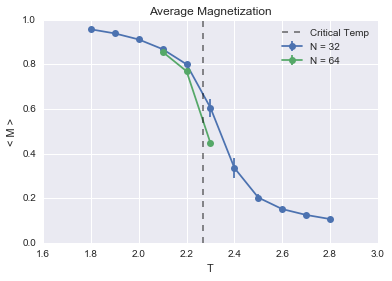

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#data = pd.read_table('DATA/data.txt',header=None,names=['N','T','i','M','U4'])
#data = pd.read_table('DATA/long_data.txt',header=None,names=['N','T','i','M','U4'])
data = pd.read_table('DATA/extra_long_data.txt',header=None,names=['N','T','i','M','U4'])

lattices = np.unique(data['N'])
for N in lattices:
    print 'N = ',N
    df = data[data['N']==N]
    avg_mag = []
    std_devs = []
    temperatures = np.unique(df['T'])
    for T in temperatures:
        df2 = df[df['T']==T]
        avg_mag.append(np.mean(df2['M'])) # average magnetization at a given temp
        std_devs.append(np.std(df2['M']))
    plt.errorbar(temperatures,avg_mag,yerr=std_devs,fmt='-o',label='N = '+str(N))
    
plt.xlim((1.6,3.0))
plt.ylabel('< M >')
plt.xlabel('T')
plt.axvline(2.269185,label=r'Critical Temp',alpha=0.5,color='black',linestyle='--')
plt.title('Average Magnetization')
plt.legend(loc='best')
#plt.savefig('/Users/jakehanson/Desktop/average_mag.pdf')
plt.show()


### And last, lets look at the binder cumulant

N =  32
N =  64


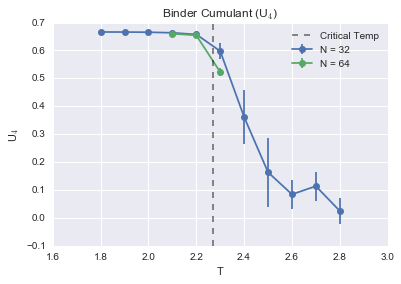

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#data = pd.read_table('DATA/data.txt',header=None,names=['N','T','i','M','U4'])
#data = pd.read_table('DATA/long_data.txt',header=None,names=['N','T','i','M','U4'])
data = pd.read_table('DATA/extra_long_data.txt',header=None,names=['N','T','i','M','U4'])

lattices = np.unique(data['N'])
for N in lattices:
    print 'N = ',N
    df = data[data['N']==N]
    avg_U = []
    std_devs = []
    temperatures = np.unique(df['T'])
    for T in temperatures:
        df2 = df[df['T']==T]
        avg_U.append(np.mean(df2['U4'])) # average Binder Cumulant at a given temp
        std_devs.append(np.std(df2['U4']))
    plt.errorbar(temperatures,avg_U,yerr=std_devs,fmt='-o',label='N = '+str(N))
    
plt.xlim((1.6,3.0))
plt.ylabel(r'U$_4$')
plt.xlabel('T')
plt.axvline(2.269185,label=r'Critical Temp',alpha=0.5,color='black',linestyle='--')
plt.title(r'Binder Cumulant (U$_4$)')
plt.legend(loc='best')
plt.savefig('/Users/jakehanson/Desktop/binder_cumulant3.pdf')
plt.show()

## The Metropolis Algorithm takes a relatively long time to reach thermal equilibrium for large systems near the critical point.
- Binder cumulant yields incorrect results for sims of 1e8 with a burn of 5e7 on a 64x64 lattice
- An "extra long" sim of length 2e8 with a burn of 1e8 seems to work the best yet.
- Should repeat for n=32 (extra long)

## But the algorithm seems to be working properly..